In [1]:
using Plots
using PyPlot

In [22]:
mutable struct NeuralNetwork
    lr::Float64  # learningrate
    wih::Array
    who::Array
end

function sigmoid(z)
    1.0 ./ (1.0 .+ exp.(-z))
end

function NewNeuralNetwork(inputnodes::Int64, 
                          hiddennodes::Int64, 
                          outputnodes::Int64, 
                          learningrate::Float64)
    wih = 2 * rand(hiddennodes, inputnodes) - 1
    who = 2 * rand(outputnodes, hiddennodes) - 1
    NeuralNetwork(learningrate, wih, who)
end

function train(ann::NeuralNetwork, input::Array, target::Array)
    hidden_output = sigmoid(ann.wih * input)
    output = sigmoid(ann.who * hidden_output)
    output_errors = target - output
    hidden_errors = transpose(ann.who) * output_errors
    ann.who += ann.lr .* (output_errors .* output .* (1.0 - output)) * transpose(hidden_output)
    ann.wih += ann.lr .* (hidden_errors .* hidden_output .* (1.0 - hidden_output)) * transpose(input)
    ann
end

function query(ann::NeuralNetwork, input)
    hidden_output = sigmoid(ann.wih * input)
    final_output = sigmoid(ann.who * hidden_output)
end


query (generic function with 1 method)

In [26]:
ann = NewNeuralNetwork(784, 100, 10, 0.3)

NeuralNetwork(0.3, [-0.711285 -0.279781 … 0.146566 0.434152; -0.101189 -0.299537 … -0.8971 0.316777; … ; 0.401442 0.318885 … 0.328026 -0.574941; 0.632411 0.533504 … -0.636003 -0.918021], [-0.218129 -0.51107 … 0.0986113 0.268024; -0.662957 0.795974 … 0.525775 -0.893897; … ; 0.985806 0.248129 … -0.34872 0.935499; 0.686817 0.566155 … -0.767777 -0.129098])

In [5]:
data_file = open("mnist_dataset/mnist_train_100.csv", "r")
data_list = readlines(data_file)
close(data_file)

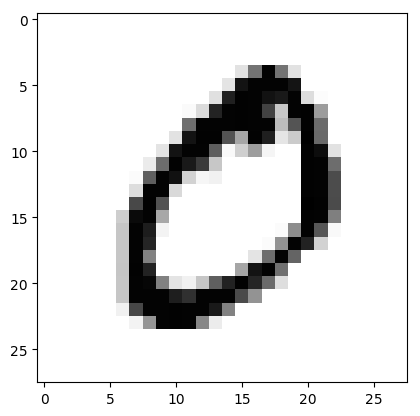

PyObject <matplotlib.image.AxesImage object at 0x0000000024E3D518>

In [6]:
all_values = split(data_list[2], ',')
v = map(x -> parse(Int, x), all_values)
image_array = transpose(reshape(v[2:785], 28, 28))
scaled_input = image_array / 255.0 * 0.99 + 0.01
imshow(scaled_input, "Greys")

In [27]:
onodes = 10
for i=2:100
    all_values = split(data_list[i], ',')
    v = map(x -> parse(Int, x), all_values[2:785])
    inputs = v / 255.0 * 0.99 + 0.01
    targets = zeros(onodes) + 0.01
    targets[parse(Int, all_values[1]) + 1] = 0.99
    ann = train(ann, inputs, targets)
end

In [7]:
test_data_file = open("mnist_dataset/mnist_test_10.csv", "r")
test_data_list = readlines(test_data_file)
close(test_data_file)
test_data_list

10-element Array{String,1}:
 "\ufeff7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

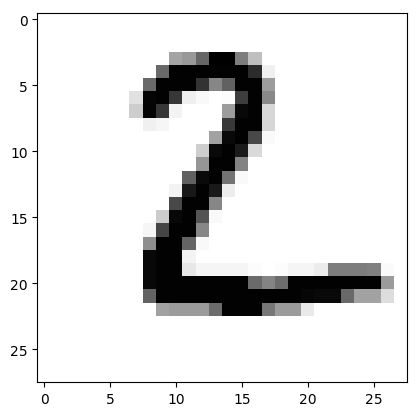

PyObject <matplotlib.image.AxesImage object at 0x000000002F95DE80>

In [45]:
all_values = split(test_data_list[2], ',')
v = map(x -> parse(Int, x), all_values)
image_array = transpose(reshape(v[2:785], 28, 28))
scaled_input = image_array / 255.0 * 0.99 + 0.01
imshow(scaled_input, "Greys")

In [46]:
all_values = split(test_data_list[2], ',')
v = map(x -> parse(Int, x), all_values[2:785])
inputs = v / 255.0 * 0.99 + 0.01
query(ann, inputs)

10-element Array{Float64,1}:
 0.0215144 
 0.100917  
 0.209035  
 0.0111055 
 0.00184447
 0.00124984
 0.0465258 
 0.0080268 
 0.0127642 
 0.002756  